In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [0]:
pip install kaldi


ERROR: Could not find a version that satisfies the requirement kaldi (from versions: none)
ERROR: No matching distribution found for kaldi


Dataset de imágenes de números del 0 al 9 de 28x28 px

* 6000 para entrenamiento
* 1000 para pruebas




In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

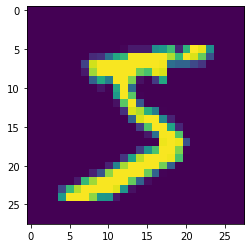

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [0]:
# normalizar valores de pixeles para que queden en rango 0,1 en ves de 0-255
X_train = tf.keras.utils.normalize(X_train, axis=0)
y_train = tf.keras.utils.normalize(y_train, axis=0)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6597 - acc: 0.8101
Epoch 2/6
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3066 - acc: 0.9097
Epoch 3/6
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2473 - acc: 0.9273
Epoch 4/6
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2102 - acc: 0.9384
Epoch 5/6
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1823 - acc: 0.9465
Epoch 6/6
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1625 - acc: 0.9525


In [0]:
loss, acc = model.evaluate(X_train, y_train)
print(loss, acc)

60000/60000 [==============================] - 2s 33us/sample - loss: 0.1478 - acc: 0.9565
0.1477612796217203 0.9565333


In [0]:
import numpy as np

pred = model.predict([X_test])

for i in range(10):
    print('Predict: ',np.argmax(pred[i]))
    print('Real: ')
    plt.imshow(X_test[i])
    plt.show()

In [0]:
X_train2 = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test2 = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
# another arq

model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(tf.keras.layers.Flatten()) # Flattening the 2D arrays for fully connected layers
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train2, y_train, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 33s 543us/sample - loss: 0.4624 - acc: 0.8633
Epoch 2/6
60000/60000 [==============================] - 32s 540us/sample - loss: 0.1843 - acc: 0.9444
Epoch 3/6
60000/60000 [==============================] - 32s 531us/sample - loss: 0.1407 - acc: 0.9564
Epoch 4/6
60000/60000 [==============================] - 32s 527us/sample - loss: 0.1163 - acc: 0.9643
Epoch 5/6
60000/60000 [==============================] - 32s 532us/sample - loss: 0.1004 - acc: 0.9701
Epoch 6/6
60000/60000 [==============================] - 32s 530us/sample - loss: 0.0877 - acc: 0.9720


In [12]:
type(y_train[0])

numpy.uint8

In [0]:
loss2, acc2 = model2.evaluate(X_train2, y_train)
print(loss2, acc2)

60000/60000 [==============================] - 12s 207us/sample - loss: 0.0596 - acc: 0.9810
0.059569138791334506 0.9810167


Predict:  7
Real: 


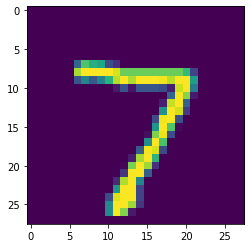

Predict:  2
Real: 


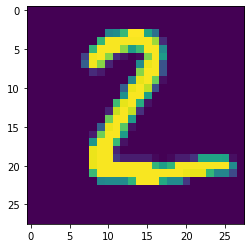

Predict:  1
Real: 


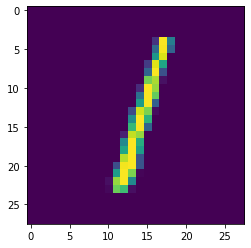

Predict:  0
Real: 


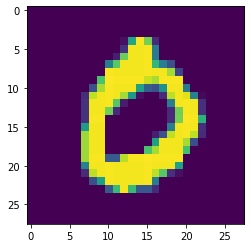

Predict:  4
Real: 


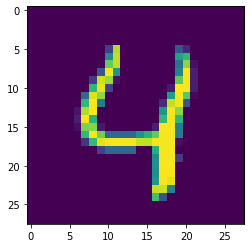

Predict:  1
Real: 


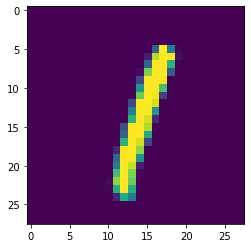

Predict:  4
Real: 


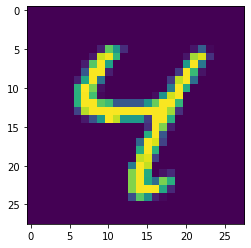

Predict:  9
Real: 


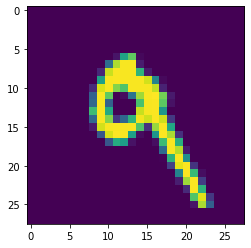

Predict:  5
Real: 


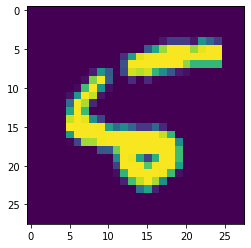

Predict:  9
Real: 


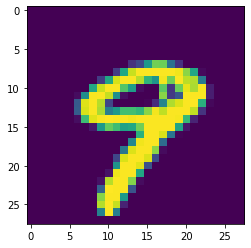

In [0]:
pred2 = model2.predict([X_test2])

for i in range(10):
    print('Predict: ',np.argmax(pred2[i]))
    print('Real: ')
    plt.imshow(X_test[i])
    plt.show()